In [1]:
import pandas as pd
import datetime
import numpy as np
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

%matplotlib inline

In [83]:
from collections import defaultdict

In [2]:
data = pd.read_csv("../data/Crimes_-_2001_to_Present.csv");
data = data.drop(columns=['Case Number', 'Beat', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Latitude', 'Longitude'])
print('--------------- Unecessary Columns DROPPED ----------------------------------')
print(data.columns)
print(data.shape)
print()

print('--------------------- Initializing 2021 data -------------------------------')
data21 = data[data['Year'] >= 2021]
print(data21.columns)
print(data21.shape)
print('----------------------------------------------------------------------------')

del data

print('----------- Calculating seconds hour and month for the data --------------------')
data21['Date'] = pd.to_datetime(data21.Date) 
data21['date'] = [d.date() for d in data21['Date']]

data21['month'] = [d.date().month for d in data21['Date']] 

data21['time'] = [d.time() for d in data21['Date']] 
data21['time'] = data21['time'].astype(str)

data21['hour'] = [d.time().hour for d in data21['Date']]


--------------- Unecessary Columns DROPPED ----------------------------------
Index(['ID', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'District', 'Ward',
       'Community Area', 'Year', 'Location'],
      dtype='object')
(7442165, 14)

--------------------- Initializing 2021 data -------------------------------
Index(['ID', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'District', 'Ward',
       'Community Area', 'Year', 'Location'],
      dtype='object')
(179768, 14)
----------------------------------------------------------------------------
----------- Calculating seconds hour and month for the data --------------------


In [4]:
data21['date'][:10], data21['month'][:10], data21['hour'][:10], data21['time'][:10]

(6909995    2021-01-03
 6927795    2021-01-03
 6927884    2021-01-03
 6931925    2021-01-03
 6931930    2021-01-03
 6931935    2021-01-03
 6931939    2021-01-03
 6940472    2021-01-03
 6940473    2021-01-03
 6940490    2021-01-03
 Name: date, dtype: object,
 6909995    1
 6927795    1
 6927884    1
 6931925    1
 6931930    1
 6931935    1
 6931939    1
 6940472    1
 6940473    1
 6940490    1
 Name: month, dtype: int64,
 6909995    13
 6927795     6
 6927884     0
 6931925    20
 6931930    20
 6931935     8
 6931939    16
 6940472    23
 6940473    22
 6940490     1
 Name: hour, dtype: int64,
 6909995    13:23:00
 6927795    06:59:00
 6927884    00:20:00
 6931925    20:47:00
 6931930    20:09:00
 6931935    08:54:00
 6931939    16:30:00
 6940472    23:47:00
 6940473    22:30:00
 6940490    01:00:00
 Name: time, dtype: object)

In [23]:
data21['district'] = "District " + (data21['District'].astype(int)).astype(str)
data21['district'][:10]

6909995     District 7
6927795     District 6
6927884    District 15
6931925     District 7
6931930     District 3
6931935     District 4
6931939    District 12
6940472     District 3
6940473    District 24
6940490     District 2
Name: district, dtype: object

In [24]:
data21['district'].unique()

array(['District 7', 'District 6', 'District 15', 'District 3',
       'District 4', 'District 12', 'District 24', 'District 2',
       'District 10', 'District 14', 'District 22', 'District 18',
       'District 5', 'District 11', 'District 9', 'District 20',
       'District 25', 'District 8', 'District 17', 'District 19',
       'District 16', 'District 1', 'District 31'], dtype=object)

In [25]:
data21['Primary Type'].unique()

array(['BATTERY', 'THEFT', 'NARCOTICS', 'HOMICIDE', 'ASSAULT',
       'WEAPONS VIOLATION', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'ROBBERY', 'BURGLARY', 'MOTOR VEHICLE THEFT',
       'SEX OFFENSE', 'OTHER OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'PUBLIC PEACE VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'STALKING', 'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'PROSTITUTION',
       'INTIMIDATION', 'KIDNAPPING', 'LIQUOR LAW VIOLATION',
       'CONCEALED CARRY LICENSE VIOLATION', 'OBSCENITY',
       'PUBLIC INDECENCY', 'HUMAN TRAFFICKING', 'NON-CRIMINAL',
       'GAMBLING', 'OTHER NARCOTIC VIOLATION'], dtype=object)

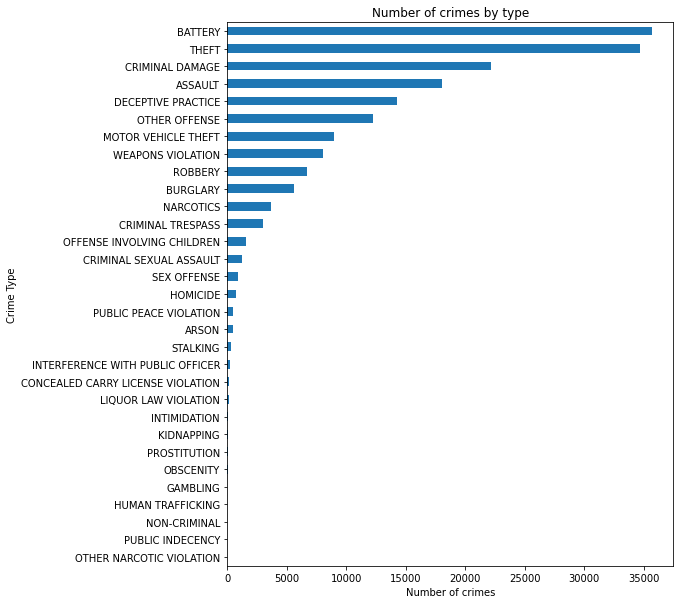

In [34]:
plt.figure(figsize=(8,10))
data21.groupby([data21['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

In [35]:
#We will use the 10 most common crime types

top10Crimes = ['BATTERY', 'THEFT', 'CRIMINAL DAMAGE', 'ASSAULT', 'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'MOTOR VEHICLE THEFT',
              'WEAPONS VIOLATION', 'ROBBERY', 'BURGLARY']

In [36]:
sub_data = data21[['Primary Type', 'district']]

In [38]:
sub_data = sub_data[sub_data['Primary Type'].isin(top10Crimes)]

In [39]:
sub_data['Primary Type'].unique()

array(['BATTERY', 'THEFT', 'ASSAULT', 'WEAPONS VIOLATION',
       'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'ROBBERY', 'BURGLARY',
       'MOTOR VEHICLE THEFT', 'OTHER OFFENSE'], dtype=object)

In [41]:
len(sub_data)

166314

Running for 1 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 285860.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 285860.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 285860.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 285860.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 285860.0
Best run was number 1
Running for 2 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8445, cost: 245313.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1158, cost: 264087.0
Init: initializi

Run 4, iteration: 2/100, moves: 1458, cost: 157271.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2118, cost: 162754.0
Best run was number 4
Running for 12 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 38856, cost: 157953.0
Run 1, iteration: 2/100, moves: 0, cost: 157953.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 19126, cost: 156553.0
Run 2, iteration: 2/100, moves: 1504, cost: 156553.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 7257, cost: 167772.0
Run 3, iteration: 2/100, moves: 3, cost: 167772.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 11693, cost: 163300.0
Run 4, iteration: 2/100, moves: 8150, cost: 163534.0
Init: initializing centroid

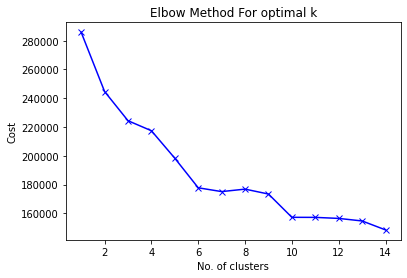

In [42]:
cost = []
K = range(1,15)
for num_clusters in list(K):
    print("Running for %d clusters" % num_clusters)
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(sub_data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For optimal k')
plt.show()

In [48]:
#Interpreting the elbow as 6
# Building the model with 6 clusters
kmode = KModes(n_clusters=6, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(sub_data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8517, cost: 191602.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 13678, cost: 191090.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 10313, cost: 195427.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 26794, cost: 201028.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 43665, cost: 195855.0
Best run was number 2


array([5, 2, 0, ..., 0, 4, 3], dtype=uint16)

In [53]:
sub_data['Cluster'] = clusters
sub_data.head()

,Primary Type,district,Clusters
6909995,BATTERY,District 7,5
6927795,THEFT,District 6,2
6927884,BATTERY,District 15,0
6931935,ASSAULT,District 4,1
6931939,THEFT,District 12,3


In [61]:
sub_data['Clusters']

6909995    5
6927795    2
6927884    0
6931935    1
6931939    3
          ..
7442160    2
7442161    3
7442162    0
7442163    4
7442164    3
Name: Clusters, Length: 166314, dtype: uint16

In [70]:
for c in range(0, 6):
    districts = []
    crimes = []
    
    for i, row in sub_data.iterrows():
        if row['Clusters'] == c:
            if row['district'] not in districts:
                districts.append(row['district'])
            if row['Primary Type'] not in crimes:
                crimes.append(row['Primary Type'])
    
    print("\n *************************************")
    print("In cluster %d:" %(c + 1))
    print("Districts are: ", districts)
    print("Crime types are: ", crimes)


 *************************************
In cluster 1:
Districts are:  ['District 15', 'District 24', 'District 22', 'District 6', 'District 4', 'District 5', 'District 12', 'District 9', 'District 18', 'District 11', 'District 8', 'District 25', 'District 20', 'District 2', 'District 3', 'District 16', 'District 19', 'District 14', 'District 10', 'District 17', 'District 1', 'District 31']
Crime types are:  ['BATTERY', 'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'ROBBERY', 'BURGLARY', 'THEFT', 'MOTOR VEHICLE THEFT', 'OTHER OFFENSE', 'WEAPONS VIOLATION', 'ASSAULT']

 *************************************
In cluster 2:
Districts are:  ['District 4', 'District 15', 'District 11', 'District 9', 'District 5', 'District 7', 'District 20', 'District 6', 'District 8', 'District 25', 'District 12', 'District 10', 'District 3', 'District 14', 'District 1', 'District 2', 'District 18', 'District 22', 'District 16', 'District 17', 'District 19', 'District 31']
Crime types are:  ['ASSAULT', 'MOTOR VEH

In [72]:
sub_data1 = data21[['Primary Type', 'district', 'hour']]
sub_data1 = sub_data1[sub_data1['Primary Type'].isin(top10Crimes)]

In [73]:
sub_data1[:10]

,Primary Type,district,hour
6909995,BATTERY,District 7,13
6927795,THEFT,District 6,6
6927884,BATTERY,District 15,0
6931935,ASSAULT,District 4,8
6931939,THEFT,District 12,16
6940472,WEAPONS VIOLATION,District 3,23
6940473,CRIMINAL DAMAGE,District 24,22
6940494,CRIMINAL DAMAGE,District 10,21
6940721,CRIMINAL DAMAGE,District 14,5
6955757,THEFT,District 22,3


Running for 1 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 441037.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 441037.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 441037.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 441037.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 441037.0
Best run was number 1
Running for 2 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7018, cost: 413043.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 12238, cost: 401234.0
Init: initializ

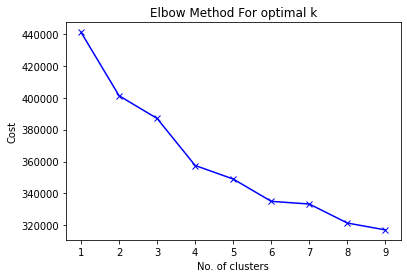

In [74]:
cost = []
K = range(1,10)
for num_clusters in list(K):
    print("Running for %d clusters" % num_clusters)
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(sub_data1)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For optimal k')
plt.show()

In [75]:
#Interpreting the elbow as 4
# Building the model with 4 clusters
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(sub_data1)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15258, cost: 372018.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 7572, cost: 370358.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 33154, cost: 371073.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 37065, cost: 374385.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 10599, cost: 376069.0
Best run was number 2


array([3, 0, 3, ..., 1, 1, 0], dtype=uint16)

In [76]:
sub_data1['Cluster'] = clusters
sub_data1.head()

,Primary Type,district,hour,Cluster
6909995,BATTERY,District 7,13,3
6927795,THEFT,District 6,6,0
6927884,BATTERY,District 15,0,3
6931935,ASSAULT,District 4,8,0
6931939,THEFT,District 12,16,2


In [77]:
sub_data1['Cluster']

6909995    3
6927795    0
6927884    3
6931935    0
6931939    2
          ..
7442160    0
7442161    0
7442162    1
7442163    1
7442164    0
Name: Cluster, Length: 166314, dtype: uint16

In [91]:
for c in range(0, 4):
    districts = defaultdict(dict)
    crimes = []
    hours = []
    
    for i, row in sub_data1.iterrows():
        if row['Cluster'] == c:
            if districts[row['district']]:
                hrs = districts[row['district']].split(",")

                if str(row['hour']) not in hrs:
                    districts[row['district']] += ',%s' %str(row['hour'])
            else:
                districts[row['district']] = '%s' %str(row['hour'])
                
            if row['Primary Type'] not in crimes:
                crimes.append(row['Primary Type'])
    
    print("\n *************************************")
    print("In cluster %d:" %(c + 1))
    print("Districts are: ", districts)
    print("Crime types are: ", crimes)


 *************************************
In cluster 1:
Districts are:  defaultdict(<class 'dict'>, {'District 6': '6,12,15,9,16,11,17,18,10,2,22,3,5,23,19,8,0,13,1,14,20,21,4', 'District 4': '8,4,12,18,14,5,23,22,6,9,1,21,10,11,17,0,16,3,15,2,19,13,20', 'District 3': '23,13,19,14,10,16,21,20,12,1,0,15,9,17,18,11,4,7,8,2,6,22,3,5', 'District 24': '22,16,9,12,23,18,13,17,19,2,8,20,11,15,14,4,1,10,21,0,3,5,6', 'District 10': '21,18,14,13,16,10,19,17,4,11,6,23,3,2,22,1,12,15,9,8,0,20,5', 'District 14': '5,10,17,11,15,19,8,12,16,14,21,22,18,3,9,23,20,13,1,2,4,0,6', 'District 22': '3,23,22,13,18,15,16,8,11,21,10,17,2,6,9,0,12,20,14,5,4,1,19', 'District 15': '14,22,19,23,21,17,3,8,16,4,9,10,5,13,11,0,12,1,15,18,20,2,6', 'District 18': '4,12,11,5,10,14,15,17,21,18,22,19,1,16,13,0,6,20,8,9,23,2,3', 'District 9': '17,22,10,21,3,23,8,15,9,2,1,16,6,14,18,4,20,12,13,19,5,11,0', 'District 20': '9,11,17,19,13,16,12,5,15,10,22,18,6,4,3,14,1,21,8,20,23,0,2', 'District 25': '3,6,11,16,21,23,14,12,19,18,4

In [113]:
sub_data2 = data21[['Primary Type', 'month']]
sub_data2 = sub_data2[sub_data2['Primary Type'].isin(top10Crimes)]

In [114]:
sub_data2.head()

,Primary Type,month
6909995,BATTERY,1
6927795,THEFT,1
6927884,BATTERY,1
6931935,ASSAULT,1
6931939,THEFT,1


In [115]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, row in sub_data2.iterrows():
    sub_data2['month'][i] = months[int(sub_data2['month'][i]) - 1]

c:\python 3.9\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [117]:
sub_data2['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November'], dtype=object)

Running for 1 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 279269.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 279269.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 279269.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 279269.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 279269.0
Best run was number 1
Running for 2 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1440, cost: 260599.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4538, cost: 236349.0
Init: initializi

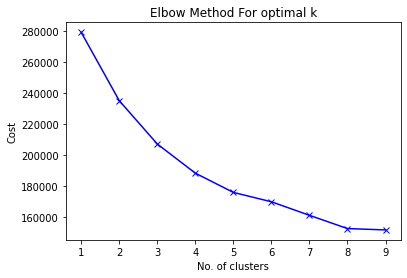

In [118]:
cost = []
K = range(1,10)
for num_clusters in list(K):
    print("Running for %d clusters" % num_clusters)
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(sub_data2)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For optimal k')
plt.show()

In [119]:
#Interpreting the elbow as 4
# Building the model with 4 clusters
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(sub_data2)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9965, cost: 202400.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 14700, cost: 202908.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 38509, cost: 198277.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 201029.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 13222, cost: 193143.0
Best run was number 5


array([0, 1, 0, ..., 0, 0, 1], dtype=uint16)

In [120]:
sub_data2['Cluster'] = clusters
sub_data2.head()

,Primary Type,month,Cluster
6909995,BATTERY,January,0
6927795,THEFT,January,1
6927884,BATTERY,January,0
6931935,ASSAULT,January,0
6931939,THEFT,January,1


In [122]:
sub_data2['Cluster']

6909995    0
6927795    1
6927884    0
6931935    0
6931939    1
          ..
7442160    2
7442161    1
7442162    0
7442163    0
7442164    1
Name: Cluster, Length: 166314, dtype: uint16

In [123]:
for c in range(0, 4):
    months = []
    crimes = []
    
    for i, row in sub_data2.iterrows():
        if row['Cluster'] == c:
            if row['month'] not in months:
                months.append(row['month'])
            if row['Primary Type'] not in crimes:
                crimes.append(row['Primary Type'])
    
    print("\n *************************************")
    print("In cluster %d:" %(c + 1))
    print("Months are: ", months)
    print("Crime types are: ", crimes)


 *************************************
In cluster 1:
Months are:  ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
Crime types are:  ['BATTERY', 'ASSAULT', 'WEAPONS VIOLATION', 'DECEPTIVE PRACTICE', 'ROBBERY', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'CRIMINAL DAMAGE', 'THEFT', 'OTHER OFFENSE']

 *************************************
In cluster 2:
Months are:  ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'September', 'October', 'November']
Crime types are:  ['THEFT', 'CRIMINAL DAMAGE', 'OTHER OFFENSE', 'ASSAULT', 'DECEPTIVE PRACTICE', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION', 'ROBBERY']

 *************************************
In cluster 3:
Months are:  ['January', 'February', 'March', 'April', 'May', 'July', 'September', 'October', 'November']
Crime types are:  ['CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'ASSAULT', 'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT', 'BURGLARY', 'OTHER OFFENSE', 'ROBBERY']
